# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.head()


,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

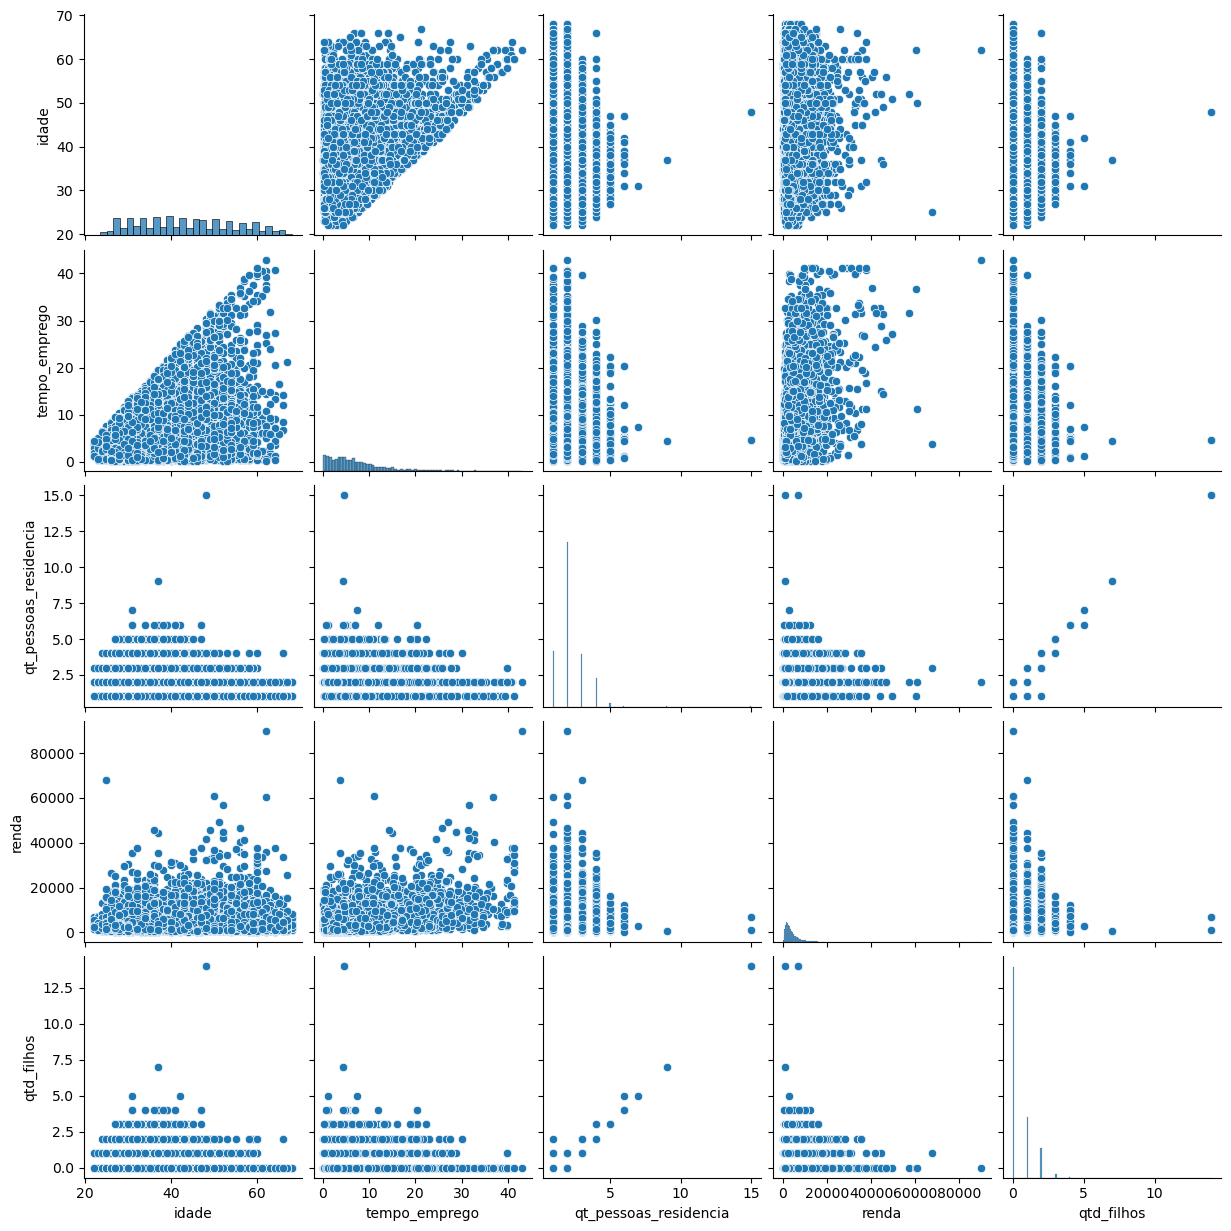

In [6]:
#Selecionando as variáveis quantitativas

quantitative_vars = ['idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'qtd_filhos']
data_quantitative = df[quantitative_vars]

#Plotando correlações com o método pairplot do seaborn

sns.pairplot(data_quantitative)
plt.show()

1 - Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

Notamos de forma descendente, da primeira para a última linha de gráficos:
*Há uma correlação direta entre a idade e o tempo de emprego. Quanto maior/menor a idade, maior/menor é o tempo de emprego
*Há uma correlação linear entre a quantidade de pessoas na residência com a quantidade de filhos.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

C:\Users\giova\AppData\Local\Temp\ipykernel_12596\4174330169.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


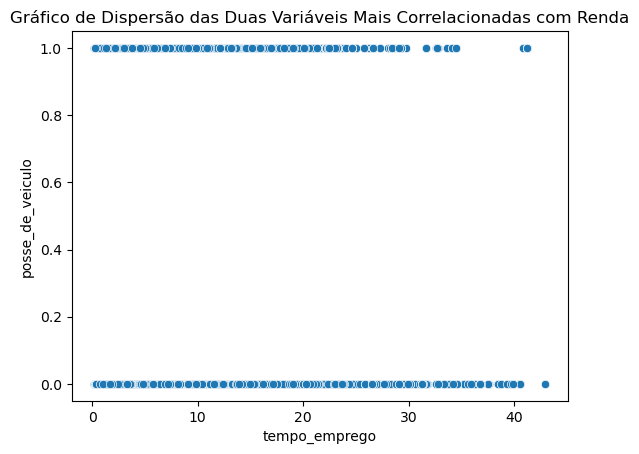

In [11]:

# atribuindo a matriz de correlação na variável corr_matrix
corr_matrix = df.corr()

#Atribuindo à variável corr_renda um filtro sobre corr_matrix em 'renda'.
#o método abs seleciona os valores absolutos
#o método sort_values(ascending_false) classifica os valores de correlação em ordem descendente
corr_renda = corr_matrix['renda'].abs().sort_values(ascending=False)

#Acessando as colunas mais correlacionadas com a renda
#[1:3] para selecionar (por índice) o segundo e o terceiro elemento, já que o primeiro é a própria coluna "renda".
#A variável corr recebe os dois atributos mais correlacionados à renda
corr = corr_renda[1:3].index

#Usando a função scatterplot() do seaborn, plotamos o gráfico de dispersão
#O eixo x representa a primeira variável mais correlacionada e o eixo y representa a segunda variável mais correlacionada.
sns.scatterplot(data=df, x=corr[0], y=corr[1])
plt.xlabel(corr[0])
plt.ylabel(corr[1])
plt.title('Gráfico de Dispersão das Duas Variáveis Mais Correlacionadas com Renda')
plt.show()


3) Na su aopinião, há outliers na variável renda?

In [13]:
#Análise estaística descritiva:
descricao_renda = df['renda'].describe()
descricao_renda

count    15000.000000
mean      4624.632946
std       4628.571729
min        159.900000
25%       1945.740000
50%       3278.260000
75%       5642.365000
max      89918.040000
Name: renda, dtype: float64

Com a análise descritiva acima podemos notar que em até 50% dos dados o valor médio é de 3278
E o valor máximo é de 89918


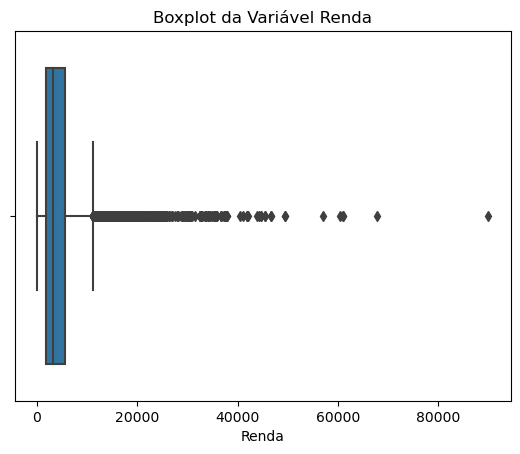

In [14]:
#Visualização com Boxplot

sns.boxplot(x=df['renda'])
plt.xlabel('Renda')
plt.title('Boxplot da Variável Renda')
plt.show()

Com base no gráfico acima podemos significar que há uma quantidade alta de outliers. No entanto, como estamos tratando de uma variável "renda" em um grupo diverso de indivíduos, é esperado que tenhamos esse resultado.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

count    15000.000000
mean         8.111047
std          0.797451
min          5.074549
25%          7.573398
50%          8.095068
75%          8.638059
max         11.406654
Name: renda_log, dtype: float64


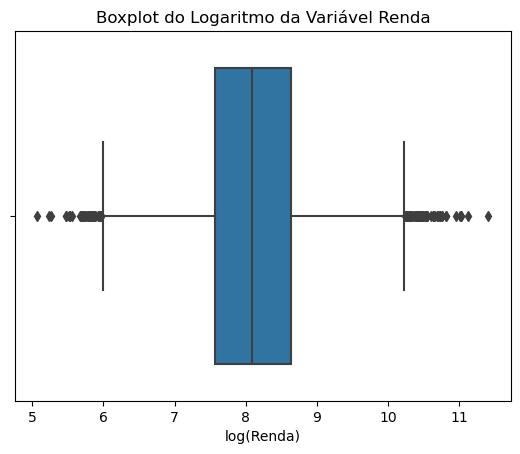

In [15]:
#Cálculo do logaritmo da variável "renda"
#calculamos o logaritmo natural da variável "renda" utilizando a função np.log() do numpy.
#Criamos uma nova coluna chamada "renda_log" no DataFrame df para armazenar os valores do logaritmo da renda.
df['renda_log'] = np.log(df['renda'])

# Análise estatística descritiva do logaritmo da variável "renda"
#A descrição estatística é armazenada na variável 'descricao_renda_log'
descricao_renda_log = df['renda_log'].describe()

print(descricao_renda_log)

# Boxplot do logaritmo da variável "renda"
#plotamos um novo boxplot do logaritmo da variável "renda". 
#O eixo x do boxplot representa a variável "renda_log" no DataFrame df.
sns.boxplot(x=df['renda_log'])
#Definindo os títulos:
plt.xlabel('log(Renda)')
plt.title('Boxplot do Logaritmo da Variável Renda')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Notamos que tanto no print da análise estaística descritiva quanto no boxplot há uma nivelação dos valores, desta forma os outliers possuem menos influência sobre a análise. A meu ver, esse tipo de transformação melhorou a performance da nossa análise.